In [1]:
import pandas as pd
import yfinance as yf
from webapp.fincalc.portfolio_analytics import calculate_stock_volatility, check_volatility_signal
import numpy as np
import matplotlib.ticker as mticker # For formatting y-axis as percentage

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
yf.download(["IONQ", "QUBT", "RGTI", "QMCO"], period="1mo", progress=False)

YF.download() has changed argument auto_adjust default to True


Price           Close                                High                    \
Ticker           IONQ       QMCO  QUBT    RGTI       IONQ       QMCO   QUBT   
Date                                                                          
2025-03-18  22.680000  19.799999  8.63  10.260  24.459000  24.400000  9.300   
2025-03-19  23.299999  19.629999  8.37   9.905  24.118999  22.840000  9.000   
2025-03-20  21.139999  16.450001  7.39   8.990  24.500000  19.500000  8.370   
2025-03-21  22.260000  16.719999  7.39   9.070  22.719999  18.600000  7.720   
2025-03-24  26.120001  17.219999  8.75   9.780  26.320000  18.450001  8.790   
2025-03-25  25.549999  16.219999  8.48   9.820  26.190001  17.639999  9.030   
2025-03-26  24.799999  15.010000  8.01   9.180  27.830000  17.070000  8.880   
2025-03-27  23.650000  15.390000  7.94   8.470  25.200001  16.990000  7.998   
2025-03-28  22.850000  14.150000  8.45   8.150  23.660000  15.370000  8.540   
2025-03-31  22.070000  14.380000  8.00   7.920  23.098000  14.580000  8.970   
2025-04-01  23.190001  14.070000  7.76   7.810  24.620001  15.300000  8.400   
2025-04-02  25.049999  13.110000  7.85   8.490  25.834999  13.830000  8.290   
2025-04-03  23.250000  12.440000  7.57   8.150  23.778999  12.600000  7.680   
2025-04-04  20.680000  11.350000  6.51   7.500  22.870001  12.000000  7.350   
2025-04-07  22.750000  11.250000  6.77   8.330  24.000000  12.500000  7.060   
2025-04-08  21.280001  10.480000  6.21   7.720  24.599001  12.480000  7.110   
2025-04-09  26.370001  12.080000  6.85   9.390  26.559999  12.390000  7.060   
2025-04-10  25.889999  11.080000  6.85   9.420  26.615000  11.860000  7.040   
2025-04-11  26.090000  11.220000  6.84   9.100  27.250000  11.480000  7.020   
2025-04-14  25.350000  12.190000  6.99   8.860  28.250000  12.300000  7.575   
2025-04-15  25.400000  11.200000  6.83   8.620  26.075001  12.880000  7.080   
2025-04-16  24.570000  10.400000  6.41   8.250  25.360001  11.130000  6.700   
2025-04-17  25.740000  10.320000  6.41   8.320  25.870001  10.780000  6.520   

Price                     Low                                Open         \
Ticker        RGTI       IONQ       QMCO   QUBT   RGTI       IONQ   QMCO   
Date                                                                       
2025-03-18  11.180  22.635000  17.559999  7.250  9.900  23.650000  19.48   
2025-03-19  10.820  22.180000  18.799999  7.931  9.650  23.590000  21.73   
2025-03-20   9.835  20.610001  15.550000  7.055  8.680  23.325001  19.25   
2025-03-21   9.140  20.860001  15.750000  6.330  8.450  20.959999  15.75   
2025-03-24   9.830  23.080000  17.000000  7.670  9.280  23.230000  18.01   
2025-03-25  10.020  25.040001  15.920000  8.230  9.470  25.770000  17.43   
2025-03-26  10.310  24.660000  14.690000  7.800  9.090  26.730000  16.40   
2025-03-27   9.190  23.445000  14.270000  7.580  8.410  24.090000  14.50   
2025-03-28   8.419  21.920000  14.070000  7.305  7.782  23.660000  15.13   
2025-03-31   8.295  21.500000  12.850000  7.650  7.680  21.670000  13.07   
2025-04-01   8.127  22.219999  13.640000  7.350  7.510  24.309999  14.73   
2025-04-02   8.920  22.690001  12.750000  7.471  7.550  23.080000  13.21   
2025-04-03   8.310  22.530001  11.740000  7.110  7.910  23.125000  12.11   
2025-04-04   7.783  19.370001  10.820000  6.310  6.980  22.600000  11.98   
2025-04-07   8.780  18.809999   9.740000  6.000  6.860  19.610001  10.00   
2025-04-08   8.960  20.650000  10.330000  6.105  7.520  24.049999  12.48   
2025-04-09   9.460  21.361000  10.360000  5.910  7.700  21.875000  10.48   
2025-04-10   9.740  24.450001  10.600000  6.520  8.850  25.330000  11.42   
2025-04-11   9.540  25.371000  10.580000  6.522  8.690  26.240000  11.20   
2025-04-14   9.700  24.750000  11.560000  6.760  8.780  27.700001  11.95   
2025-04-15   8.960  24.665001  11.200000  6.710  8.450  25.590000  12.55   
2025-04-16   8.420  23.801001  10.280000  6.280  7.980  24.450001  10.66   
2025-04-17   8.475  24.480000   9.960000  6.2

In [3]:

# Define the stock tickers
tickers = ['IONQ', 'QUBT', 'RGTI', 'QMCO']

# Define the period for historical data (e.g., "1y" for one year)
period = "5d"

# Calculate the daily volatility (standard deviation of daily returns)
print(f"Calculating daily volatility for {tickers} over the past {period}...")
volatility_data = calculate_stock_volatility(tickers, period=period)

INFO:webapp.fincalc.portfolio_analytics:Calculating volatility for tickers: ['IONQ', 'QUBT', 'RGTI', 'QMCO'] over period: 5d


Calculating daily volatility for ['IONQ', 'QUBT', 'RGTI', 'QMCO'] over the past 5d...


INFO:webapp.fincalc.portfolio_analytics:Volatility calculation complete: {'IONQ': np.float64(0.03701787974866409), 'QUBT': np.float64(0.03564262706481875), 'RGTI': np.float64(0.021695836432332933), 'QMCO': np.float64(0.07717159506179068)}


In [4]:
volatility_data

{'IONQ': np.float64(0.03701787974866409),
 'QUBT': np.float64(0.03564262706481875),
 'RGTI': np.float64(0.021695836432332933),
 'QMCO': np.float64(0.07717159506179068)}

In [5]:


# Or use the default 5 days
signal_results_default = check_volatility_signal(tickers, volatility_data, recent_period="2d")

INFO:webapp.fincalc.portfolio_analytics:Checking volatility signal for tickers: ['IONQ', 'QUBT', 'RGTI', 'QMCO']
INFO:webapp.fincalc.portfolio_analytics:Fetching recent data for period: 2d for tickers: ['IONQ', 'QUBT', 'RGTI', 'QMCO']
INFO:webapp.fincalc.portfolio_analytics:Volatility signal check complete. Returning DataFrame.


In [6]:
signal_results_default

,latest_return,sigma,is_significant,status
ticker,,,,
IONQ,0.047619,0.037018,True,Success
QUBT,0.000000,0.035643,False,Success
RGTI,0.008485,0.021696,False,Success
QMCO,-0.007692,0.077172,False,Success


Analyzing HOURLY volatility for ['IONQ', 'QUBT', 'RGTI', 'QMCO'] over 3d (5m interval) with a 24-hour window...
Price                        Close                          High         \
Ticker                        IONQ   QMCO    QUBT    RGTI   IONQ   QMCO   
Datetime                                                                  
2025-04-17 23:35:00+00:00  25.8900  10.42  6.4103  8.3299  25.89  10.42   
2025-04-17 23:40:00+00:00  25.8895    NaN     NaN  8.3202  25.89    NaN   
2025-04-17 23:45:00+00:00  25.7996  10.42  6.4300  8.3300  25.86  10.42   
2025-04-17 23:50:00+00:00  25.7600    NaN  6.4300  8.3500  25.89    NaN   
2025-04-17 23:55:00+00:00  25.8999    NaN  6.4107  8.3300  25.90    NaN   

Price                                        Low                           \
Ticker                       QUBT  RGTI     IONQ     QMCO    QUBT    RGTI   
Datetime                                                                    
2025-04-17 23:35:00+00:00  6.4103  8.33  25.8700  10.420

/var/folders/pf/208rzxg52mgdzw7l_q0vql5h0000gn/T/ipykernel_59697/3729715878.py:33: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  hourly_returns = close_prices.pct_change()


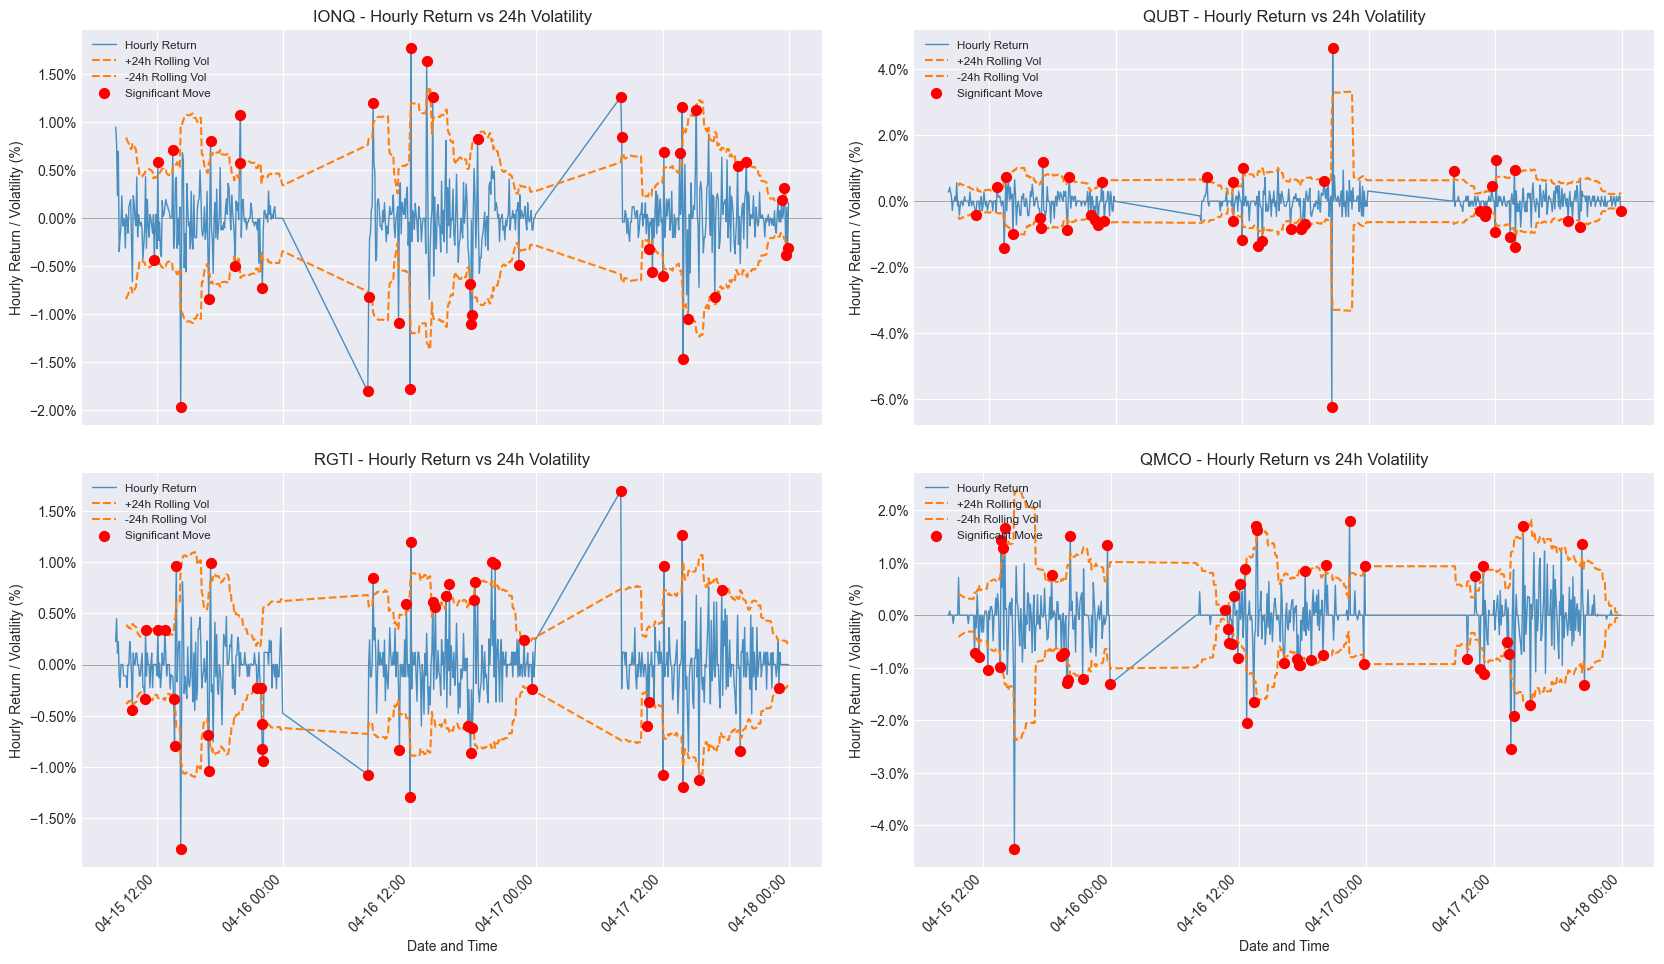

In [7]:
# Define the tickers and the period/interval for analysis
# tickers = ['IONQ', 'QUBT', 'RGTI', 'QMCO'] # Make sure this list is defined
fetch_period = "3d"       # Fetch data for the last 7 days
fetch_interval = "5m"     # Fetch hourly data
rolling_window = 24     # Rolling window in hours (e.g., one trading day)
vol_factor = 2
print(f"Analyzing HOURLY volatility for {tickers} over {fetch_period} ({fetch_interval} interval) with a {rolling_window}-hour window...")

try:
    # Fetch historical INTRADAY data
    hist_data = yf.download(
        tickers,
        period=fetch_period,
        interval=fetch_interval,
        prepost=True,
        progress=False
    )

    # Optional: Filter out data outside regular trading hours
    # hist_data = hist_data.tz_convert('America/New_York')
    # hist_data = hist_data.between_time('09:30', '16:00')
    # hist_data = hist_data.tz_convert(None)
    print(hist_data.tail())

    if hist_data.empty:
        print("Could not fetch historical intraday data. Check period/interval/ticker validity.")
    else:
        close_prices = hist_data['Low']
        if isinstance(close_prices, pd.Series) and len(tickers) == 1:
            close_prices = close_prices.to_frame(name=tickers[0])

        # Calculate HOURLY returns
        hourly_returns = close_prices.pct_change()

        # Calculate rolling standard deviation (HOURLY volatility)
        rolling_volatility = vol_factor * hourly_returns.rolling(window=rolling_window, min_periods=rolling_window//2 + 1).std()

        # Identify significant moves (current hourly return > previous hour's rolling vol)
        significant_moves = np.abs(hourly_returns) > rolling_volatility.shift(1)

        # --- Plotting ---
        num_tickers = len(tickers)
        plt.style.use('seaborn-v0_8-darkgrid')

        cols = 2
        rows = (num_tickers + cols - 1) // cols
        fig, axes = plt.subplots(rows, cols, figsize=(17, rows * 5), squeeze=False) # Adjusted size
        axes_flat = axes.flatten()

        for i, ticker in enumerate(tickers):
            ax = axes_flat[i] # Use single axis per subplot now

            if ticker not in hourly_returns.columns or hourly_returns[ticker].isnull().all():
                ax.set_title(f"{ticker} - Data Missing or Empty")
                continue

            # Prepare data, dropping potential NaNs from the start
            plot_returns = hourly_returns[ticker].dropna()
            plot_vol = rolling_volatility[ticker].dropna()
            # Align significant moves boolean series with returns index for plotting markers
            plot_sig_moves = significant_moves[ticker].reindex(plot_returns.index).fillna(False)


            # Plot HOURLY RETURNS
            color_ret = 'tab:blue'
            ax.plot(plot_returns.index, plot_returns, color=color_ret, label='Hourly Return', linewidth=1, alpha=0.8)

            # Plot ROLLING VOLATILITY on the SAME axis
            color_vol = 'tab:orange'
            # Plot both positive and negative volatility lines for comparison band
            ax.plot(plot_vol.index, plot_vol, color=color_vol, label=f'+{rolling_window}h Rolling Vol', linestyle='--', linewidth=1.5)
            ax.plot(plot_vol.index, -plot_vol, color=color_vol, label=f'-{rolling_window}h Rolling Vol', linestyle='--', linewidth=1.5)


            # Find points where significant moves occurred
            significant_idx = plot_returns.index[plot_sig_moves]
            significant_returns_plot = plot_returns.loc[significant_idx]

            # Plot markers for significant moves on the returns plot
            if not significant_idx.empty:
                ax.scatter(significant_idx, significant_returns_plot, color='red', marker='o', s=50, label='Significant Move', zorder=5)

            # Add a horizontal line at 0
            ax.axhline(0, color='grey', linestyle='-', linewidth=0.5)

            # Formatting
            ax.set_xlabel('Date and Time')
            ax.set_ylabel('Hourly Return / Volatility (%)')
            ax.set_title(f'{ticker} - Hourly Return vs {rolling_window}h Volatility')
            ax.yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1.0)) # Format y-axis as percentage

            # Improve x-axis date formatting
            ax.xaxis.set_major_locator(mdates.AutoDateLocator(minticks=4, maxticks=8))
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
            fig.autofmt_xdate(rotation=45)

            # Add legend
            ax.legend(loc='upper left', fontsize='small')


        # Hide any unused subplots
        for j in range(i + 1, len(axes_flat)):
             fig.delaxes(axes_flat[j])

        plt.tight_layout(pad=2.0)
        plt.show()

except Exception as e:
    print(f"An error occurred during analysis or plotting: {e}")

Fetching data for ['IONQ', 'QUBT', 'RGTI', 'QMCO'] from 2025-03-10 to 2025-04-18 with interval 5m...
Data fetched successfully.
Calculating signals using 'bollinger_bands' strategy...
Signals calculated.
Running backtest simulation...
Backtest simulation complete.
Calculating performance metrics...
Performance Metrics:
- Initial Capital: 1000.00
- Final Portfolio Value: 1332.62
- Total Return (%): 33.26
- Annualized Return (%): 1479.99
- Annualized Volatility (%): 2.74
- Sharpe Ratio: 540.13
- Max Drawdown (%): -4.94
- Number of Trades: 2336.00
- Win Rate (%): 100.00


/Users/abatutin/Documents/projects/interactive-brokers-web-api/backtester/simple_backtester.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data[f'{ticker}_Close'] = data['Close'][ticker]
/Users/abatutin/Documents/projects/interactive-brokers-web-api/backtester/simple_backtester.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data[f'{ticker}_Close'] = data['Close'][ticker]
/Users/abatutin/Documents/projects/interactive-brokers-web-api/backtester/simple_backtester.py:108: SettingWithCop

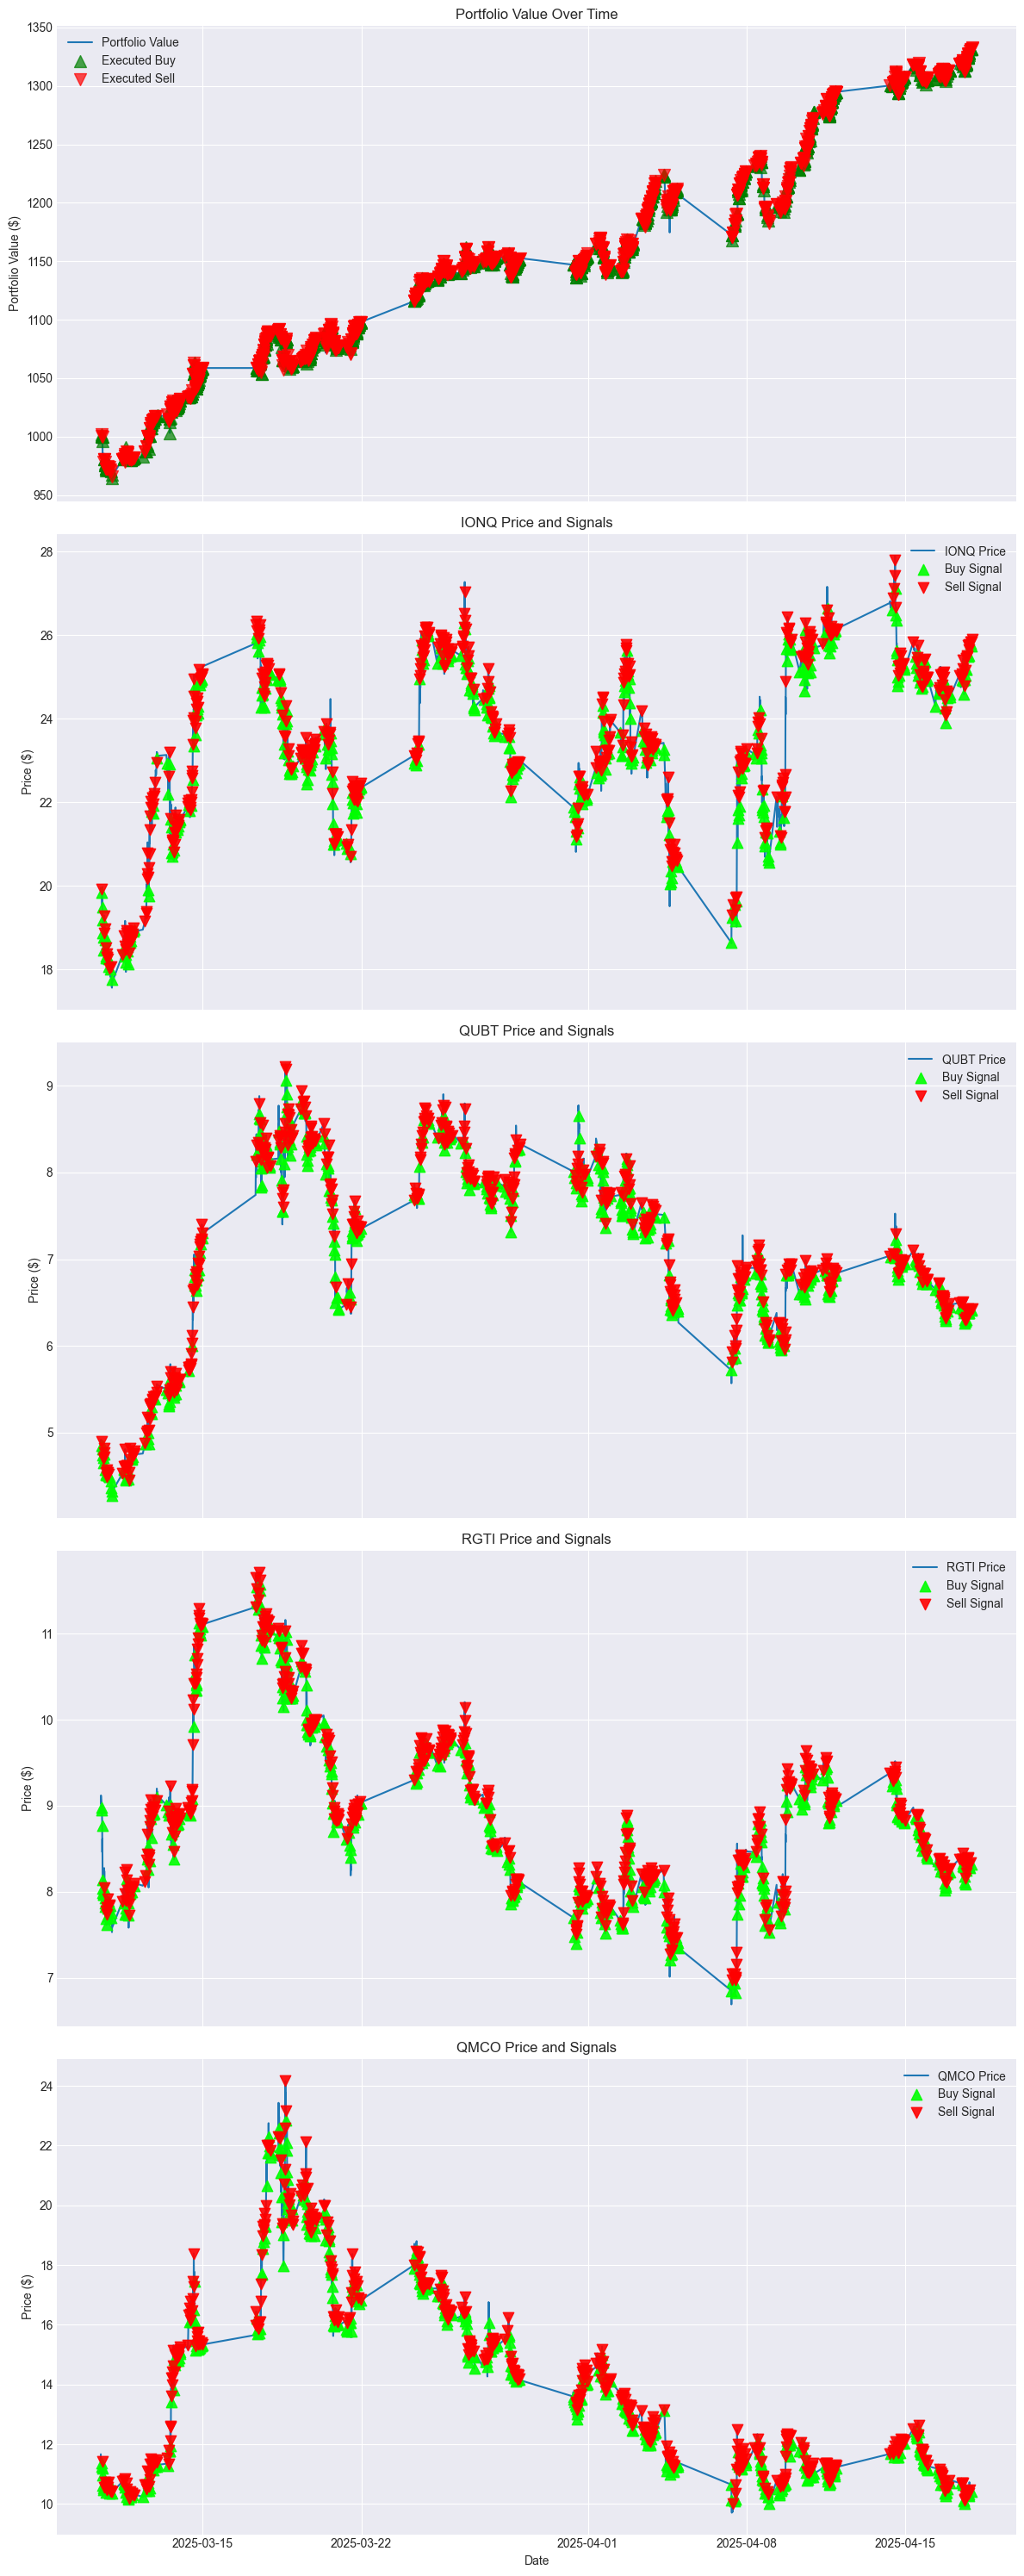

In [31]:
from backtester.simple_backtester import SimpleBacktester

tickers_to_test = tickers
start = '2025-03-10'
end = '2025-04-18'

bb_params = {
        'window': 5,    # 20-day SMA
        'num_std': 1.0   # 2 standard deviations
    }

backtester = SimpleBacktester(
        tickers=tickers_to_test,
        start_date=start,
        end_date=end,
        strategy_name='bollinger_bands',
        strategy_params=bb_params,
        initial_capital=1000.0,
        trade_size_fraction=0.1,
        interval='5m'
    )


backtester.run()
backtester.plot_results() # Show plot after running